In [54]:
# import all necessary libraries
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

%matplotlib inline

In [55]:
# import the uci diabetes dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv"

df = pd.read_csv(url)

In [56]:
df.describe(include = 'all')

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,NaN,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320
mean,48.028846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.151466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,47.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# checking for missing values
df.isnull().values.any()

False

In [58]:
# checking for extreme skewness
df['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

### Visualizing data

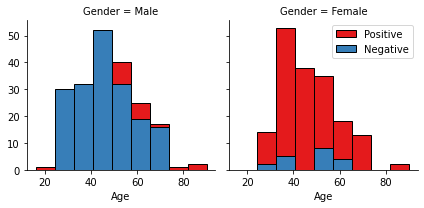

In [59]:
import seaborn as sns

# trying to see relation between Age, Gender and class
bins = np.linspace(df.Age.min(), df.Age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="class", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

   Gender Polyuria     class  count
0  Female       No  Negative     19
1  Female       No  Positive     44
2  Female      Yes  Positive    129
3    Male       No  Negative    166
4    Male       No  Positive     33
5    Male      Yes  Negative     15
6    Male      Yes  Positive    114


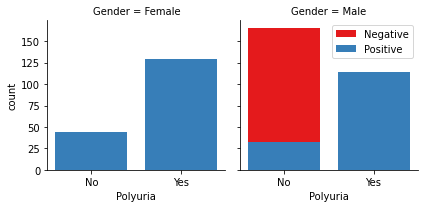

In [60]:
# trying to see relation between Polyuria, Gender and class

temp = df
#temp['Polyuria'] = temp['Polyuria'].astype('category')
df1 = temp.groupby(['Gender','Polyuria','class']).size().reset_index(name='count')
print (df1)
g = sns.FacetGrid(df1, col="Gender", hue="class", palette="Set1", col_wrap=2)
g.map(plt.bar , "Polyuria" , "count")

g.axes[-1].legend()
plt.show()

### Datat Preprocessing

In [61]:
# Replacing categorical values with binary 0 and 1
df['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True)
df['Polyuria'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True)
df['Polydipsia'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True)
df['sudden weight loss'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True)
df['weakness'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True)
df['Polyphagia'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True)
df['Genital thrush'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True)
df['visual blurring'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True)
df['Itching'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True)
df['Irritability'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True)
df['delayed healing'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True)
df['partial paresis'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True)
df['muscle stiffness'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True)
df['Alopecia'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True)
df['Obesity'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True)

In [62]:
# Normalize Age column
df["Age"] = df["Age"].apply(lambda x: (x-df["Age"].mean())/(df["Age"].max()-df["Age"].min()))

In [63]:
columns = [column for column in df.columns if column not in ["class"]]
X = df[columns]
y = df["class"].values
print(X[0:5])
print(y[0:5])

        Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0 -0.108498       0         0           1                   0         1   
1  0.134745       0         0           0                   0         1   
2 -0.094984       0         1           0                   0         1   
3 -0.040930       0         0           0                   1         1   
4  0.161772       0         1           1                   1         1   

   Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0           0               0                0        1             0   
1           0               0                1        0             0   
2           1               0                0        1             0   
3           1               1                0        1             0   
4           1               0                1        1             1   

   delayed healing  partial paresis  muscle stiffness  Alopecia  Obesity  
0                1                0

### Split Training & Testing Data

In [64]:
from sklearn.model_selection import train_test_split

# splitting data into 2 sets to get test set 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

# splitting non test set part further into training and cross validation set
X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.25, random_state=3)


print ('Train set:', X_train.shape,  y_train.shape)
print('Cross-Validation set:', X_val.shape,  y_val.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (390, 16) (390,)
Cross-Validation set: (130, 16) (130,)
Test set: (104, 16) (104,)


### Classification Models

#### Logistic Regression

In [65]:
# Using Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
Klr = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
mean_acc = {}

for n in Klr:
    
    #Train Model and Predict  
    LR = LogisticRegression(C=100, solver=n, max_iter = 1500).fit(X_train,y_train)
    yhat=LR.predict(X_test)
    mean_acc[n] = metrics.accuracy_score(y_test, yhat)

mean_acc


{'newton-cg': 0.9519230769230769,
 'lbfgs': 0.9519230769230769,
 'liblinear': 0.9519230769230769,
 'sag': 0.9519230769230769,
 'saga': 0.9519230769230769}

In [66]:
# Since liblinear seems to give highest accuracy, we'll go ahead with liblinear for final model
LR_final = LogisticRegression(C=100, solver="liblinear", max_iter = 1500).fit(X_train,y_train)
LR_final

LogisticRegression(C=100, max_iter=1500, solver='liblinear')

#### Decision tree

In [67]:
# Using Decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

Kd = 15 # for depth
mean_acc = np.zeros((Kd-1))
std_acc = np.zeros((Kd-1))

for n in range(1,Kd):
    
    #Train Model and Predict  
    dTree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    dTree.fit(X_train,y_train)
    yhat=dTree.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.84615385, 0.93269231, 0.93269231, 0.92307692, 0.96153846,
       0.97115385, 0.99038462, 0.99038462, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

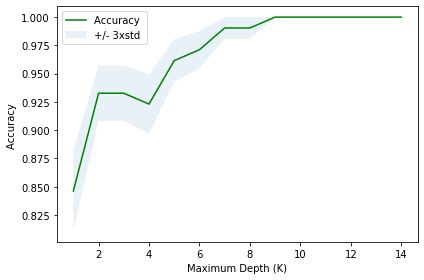

The best accuracy was with 1.0 with k= 9


In [68]:
## Plot the accuracies and see which k value is the best
plt.plot(range(1,Kd),mean_acc,'g')
plt.fill_between(range(1,Kd),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Maximum Depth (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [80]:
# Since all k values after 9 seem to give high accuracy final model for evaluation will be with k = 9
drugTree_final = DecisionTreeClassifier(criterion="entropy", max_depth = 11)
drugTree_final.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11)

### Model Evaluation using different metrics

In [82]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_score
from sklearn.metrics import plot_confusion_matrix

#### Logistic Regression

0.9382642998027614
0.9024390243902439
0.17082538879001244


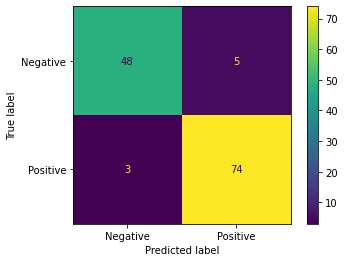

In [83]:
# evaluation for the Logistic Regression  algo
yhat_val = LR_final.predict(X_val)
yhat_val_prob = LR_final.predict_proba(X_val)

# evaluation for the Logistic Regression algo
f1score = f1_score(y_val, yhat_val, average='weighted')
jaccard = jaccard_score(y_val, yhat_val , pos_label="Positive")
logloss = log_loss(y_val, yhat_val_prob)

print(f1score)
print(jaccard)
print(logloss)

# plotting confusion matrix
plot_confusion_matrix(LR_final, X_val, y_val)
plt.show()

#### Decision tree

0.992295876166844
0.9871794871794872


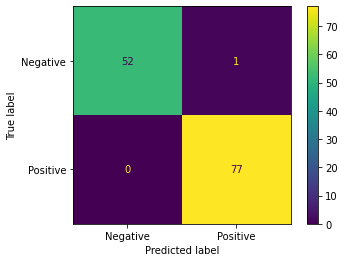

In [84]:
# evaluation for the Decision tree algo

yhat_val = drugTree_final.predict(X_val)

f1score = f1_score(y_val, yhat_val, average='weighted')
jaccard = jaccard_score(y_val, yhat_val , pos_label="Positive")

print(f1score)
print(jaccard)

# plotting confusion matrix
plot_confusion_matrix(drugTree_final, X_val, y_val)
plt.show()